<a href="https://colab.research.google.com/github/abhishhari/Research-Project/blob/main/darkphase_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install scikit-posthocs
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from datetime import datetime
from scipy import stats
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn
import seaborn as sns
import powerlaw
from scipy.stats import linregress

In [4]:
# Read data for all four groups
group0 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/darkphase/Group0.csv')
group10 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/darkphase/Group10.csv')
group20 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/darkphase/Group20.csv')
group50 = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/darkphase/Group50.csv')

In [ ]:
# Print summary statistics for each group
print('Group 0 summary statistics:')
print(group0.describe())
print('\n')
print('Group 10 summary statistics:')
print(group10.describe())
print('\n')
print('Group 20 summary statistics:')
print(group20.describe())
print('\n')
print('Group 50 summary statistics:')
print(group50.describe())

Group 0 summary statistics:
         Interval      X Total  X Ambulatory      Z Total
count  443.000000   443.000000    443.000000   443.000000
mean    49.227991   448.932280    188.277652   180.117381
std     17.325077   398.756914    221.737885   271.559173
min     13.000000     0.000000      0.000000     0.000000
25%     35.000000   146.000000     26.000000     1.000000
50%     49.000000   314.000000    102.000000    61.000000
75%     63.000000   675.000000    269.000000   259.000000
max     88.000000  1958.000000   1234.000000  1410.000000


Group 10 summary statistics:
         Interval      X Total  X Ambulatory      Z Total
count  444.000000   444.000000    444.000000   444.000000
mean    50.274775   425.614865    167.740991   151.121622
std     16.958885   376.538281    210.321227   276.110307
min     13.000000     0.000000      0.000000     0.000000
25%     36.000000   138.000000     24.000000     0.000000
50%     50.000000   308.000000     75.000000    33.000000
75%     64.00

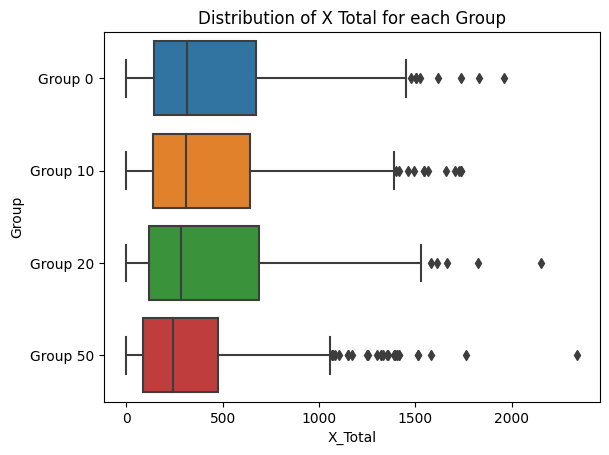

In [5]:
# Create a horizontal box plot to compare the distributions of each group
sns.boxplot(data=[group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total']], orient="h")
plt.yticks([0,1,2,3], ['Group 0', 'Group 10', 'Group 20', 'Group 50'])
plt.ylabel('Group')
plt.xlabel('X_Total')
plt.title('Distribution of X Total for each Group')
plt.show()

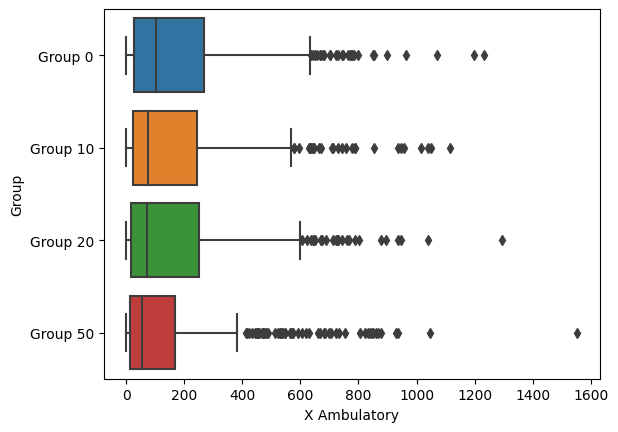

In [6]:
# Create a box plot to compare the distributions of each group
sns.boxplot(data=[group0['X Ambulatory'], group10['X Ambulatory'], group20['X Ambulatory'], group50['X Ambulatory']],orient="h")
plt.yticks([0,1,2,3], ['Group 0', 'Group 10', 'Group 20', 'Group 50'])
plt.ylabel('Group')
plt.xlabel('X Ambulatory')
plt.show()

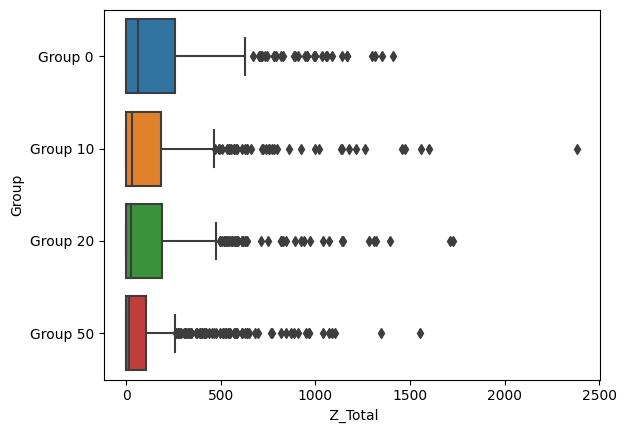

In [7]:
# Create a box plot to compare the distributions of each group
sns.boxplot(data=[group0['Z Total'], group10['Z Total'], group20['Z Total'], group50['Z Total']],orient="h")
plt.yticks([0,1,2,3], ['Group 0', 'Group 10', 'Group 20', 'Group 50'])
plt.ylabel('Group')
plt.xlabel(' Z_Total')
plt.show()

In [8]:
# Combine the data for all groups into a single DataFrame
data = pd.concat([group0, group10, group20, group50])
print(data.head())

      Subject  Interval       Date/Time  X Total  X Ambulatory  Z Total
0  control 36        13  05/07/11 20:07      325           145       46
1  control 36        14  05/07/11 20:19      437           121       30
2  control 36        15  05/07/11 20:33      211            52       69
3  control 36        16  05/07/11 20:45      375           143       77
4  control 36        17  05/07/11 20:59      481           121      119


In [11]:
# Check for any missing values
if data.isnull().values.any():
    print("Warning: Missing values detected")

In [10]:
# Check for outliers
outlier_threshold = 3
z_scores = stats.zscore(data['X Total'])
outliers = np.abs(z_scores) > outlier_threshold
if outliers.any():
    print("Warning: Outliers detected")

In [12]:
# Check normality of data
for group in [group0, group10, group20, group50]:
    if not stats.normaltest(group['X Total']).pvalue > 0.05:
        print("Warning: Data does not appear to be normally distributed")

In [13]:
# Check for equal variance
if not stats.levene(group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total']).pvalue > 0.05:
    print("Warning: Data does not appear to have equal variance")

In [14]:
# Perform one-way ANOVA
fvalue, pvalue = stats.f_oneway(group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total'])

In [15]:
# Print the results
print("F-value:", fvalue)
print("P-value:", pvalue)

F-value: 7.202362628092822
P-value: 8.303655339546851e-05


In [16]:
 # Combine the data from all groups into a single array
data = np.concatenate([group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total']])

In [17]:
# Combine the data from all groups into a single array
data = np.concatenate([group0['X Ambulatory'], group10['X Ambulatory'], group20['X Ambulatory'], group50['X Ambulatory']])

In [18]:
# Combine the data from all groups into a single array
data = np.concatenate([group0['Z Total'], group10['Z Total'], group20['Z Total'], group50['Z Total']])

In [19]:
# Create an array of group labels
groups = ['Group 0'] * len(group0) + ['Group 10'] * len(group10) + ['Group 20'] * len(group20) + ['Group 50'] * len(group50)

In [25]:
# Perform the Kruskal-Wallis test
stat, p = kruskal(group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total'])
# Print the results
print('Kruskal-Wallis test')
print('-------------------')
print(f'Statistic: {stat}')
print(f'p-value: {p}')

Kruskal-Wallis test
-------------------
Statistic: 23.07013948707163
p-value: 3.9046159234537785e-05


In [26]:
# Perform the Kruskal-Wallis test
stat1, p1 = kruskal(group0['X Ambulatory'], group10['X Ambulatory'], group20['X Ambulatory'], group50['X Ambulatory'])
# Print the results
print('Kruskal-Wallis test')
print('-------------------')
print(f'Statistic: {stat1}')
print(f'p-value: {p1}')

Kruskal-Wallis test
-------------------
Statistic: 23.399213688259863
p-value: 3.3339617164298305e-05


In [27]:
# Perform the Kruskal-Wallis test
stat2, p2 = kruskal(group0['Z Total'], group10['Z Total'], group20['Z Total'], group50['Z Total'])
# Print the results
print('Kruskal-Wallis test')
print('-------------------')
print(f'Statistic: {stat2}')
print(f'p-value: {p2}')

Kruskal-Wallis test
-------------------
Statistic: 36.27351933773236
p-value: 6.554704691656475e-08


In [28]:
# Concatenate all groups into a single dataframe
df = pd.concat([group0, group10, group20, group50])

In [29]:
# Add a column for group membership
df['group'] = ['group0'] * len(group0) + ['group10'] * len(group10) + ['group20'] * len(group20) + ['group50'] * len(group50)

           group0   group10   group20   group50
group0   1.000000  1.000000  1.000000  0.000157
group10  1.000000  1.000000  1.000000  0.001753
group20  1.000000  1.000000  1.000000  0.001925
group50  0.000157  0.001753  0.001925  1.000000


Text(0.5, 0.5, 'posthoc:            group0   group10   group20   group50\ngroup0   1.000000  1.000000  1.000000  0.000157\ngroup10  1.000000  1.000000  1.000000  0.001753\ngroup20  1.000000  1.000000  1.000000  0.001925\ngroup50  0.000157  0.001753  0.001925  1.000000')

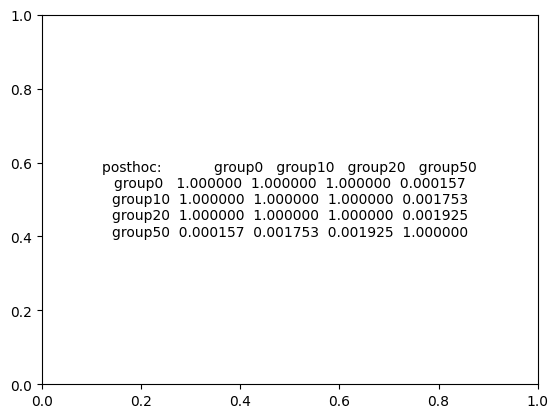

In [31]:
# Perform the Dunn's test
posthoc = posthoc_dunn(df, val_col='X Total', group_col='group', p_adjust='bonferroni')
print(posthoc)


# Add text to the plot
text = "posthoc: " + str(posthoc)
plt.text(0.5, 0.5, text, ha='center', va='center')




In [32]:
# Perform the Dunn's test
posthoc = posthoc_dunn(df, val_col='X Ambulatory', group_col='group', p_adjust='bonferroni')
print(posthoc)

           group0   group10   group20   group50
group0   1.000000  1.000000  0.073385  0.000023
group10  1.000000  1.000000  1.000000  0.006134
group20  0.073385  1.000000  1.000000  0.148400
group50  0.000023  0.006134  0.148400  1.000000


In [33]:
# Perform the Dunn's test
posthoc = posthoc_dunn(df, val_col='Z Total', group_col='group', p_adjust='bonferroni')
print(posthoc)

               group0   group10   group20       group50
group0   1.000000e+00  0.079834  0.003491  1.557134e-08
group10  7.983438e-02  1.000000  1.000000  4.843237e-03
group20  3.491030e-03  1.000000  1.000000  4.555767e-02
group50  1.557134e-08  0.004843  0.045558  1.000000e+00


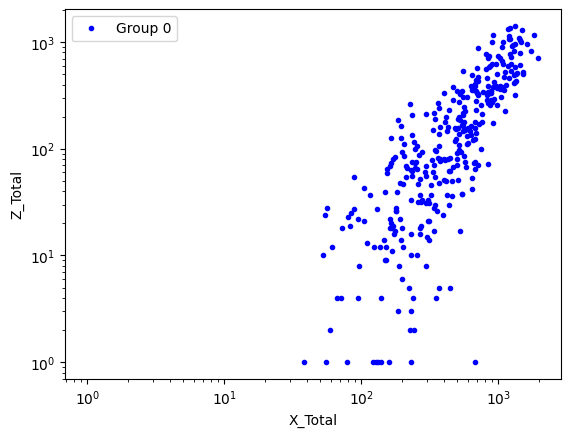

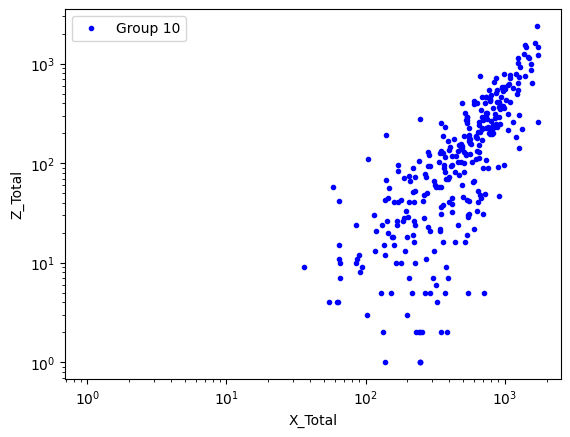

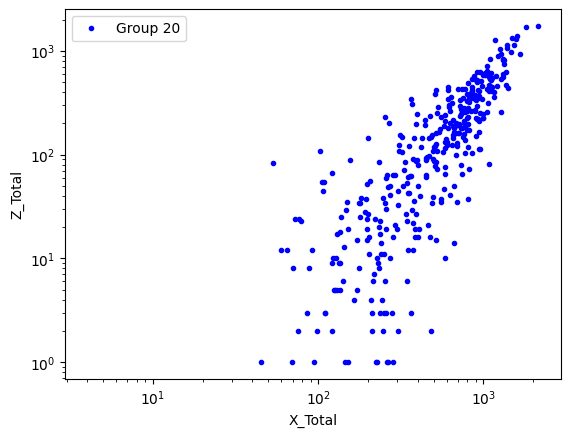

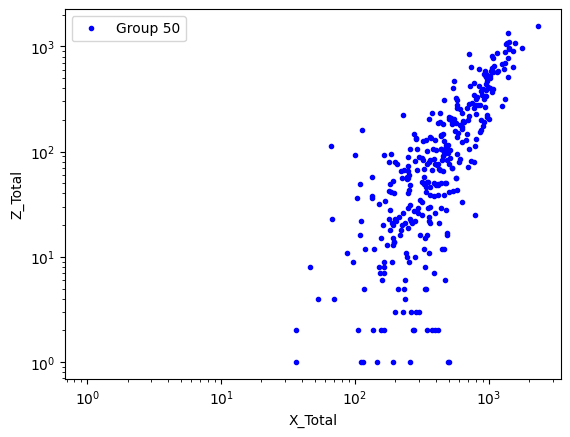

In [34]:
# Define X and Z total for each group
x_total = [group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total']]
z_total = [group0['Z Total'], group10['Z Total'], group20['Z Total'], group50['Z Total']]

# Define colors for each group
colors = ['blue', 'blue', 'blue', 'blue']

# Define labels for the plot
labels = ['Group 0', 'Group 10', 'Group 20', 'Group 50']


# Plot X Total on the x-axis and Z Total on the y-axis
for i in range(len(x_total)):
    fig, ax = plt.subplots()
    ax.loglog(x_total[i], z_total[i], '.', color=colors[i], label=labels[i])
    ax.legend()
    ax.set_xlabel('X_Total')
    ax.set_ylabel('Z_Total')
    plt.show()

Slope for Group 0: 0.5720885540128586


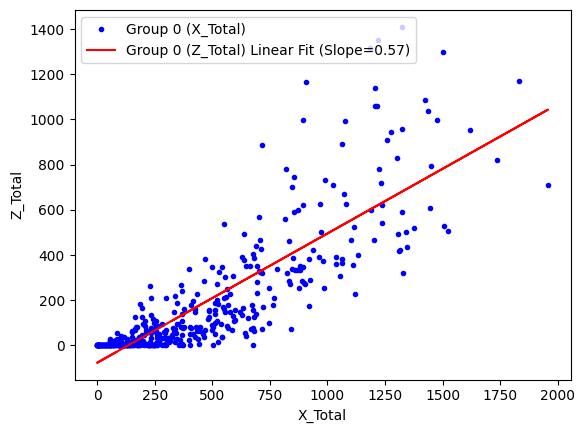

Slope for Group 10: 0.595628065561326


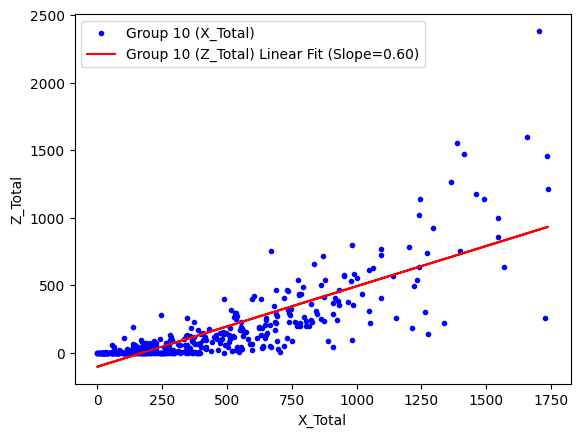

Slope for Group 20: 0.5454579052168215


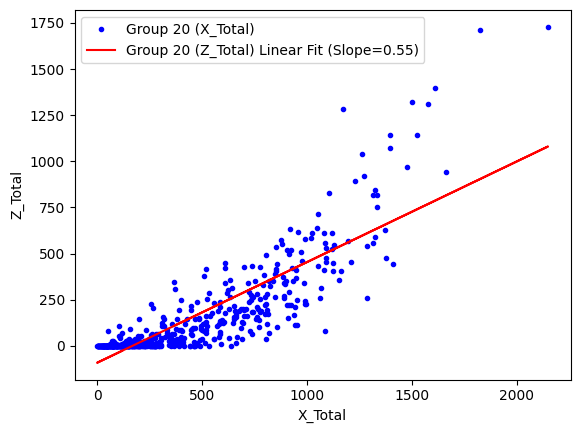

Slope for Group 50: 0.5220185054692048


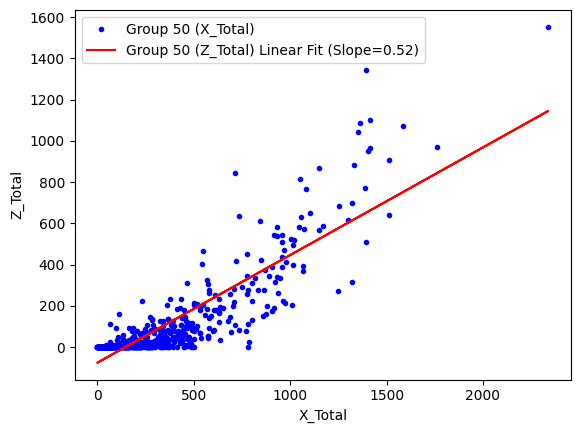

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define X and Z total for each group
x_total = [group0['X Total'], group10['X Total'], group20['X Total'], group50['X Total']]
z_total = [group0['Z Total'], group10['Z Total'], group20['Z Total'], group50['Z Total']]

# Define colors for each variable
x_color = 'blue'
z_color = 'red'

# Define labels for the plot
labels = ['Group 0', 'Group 10', 'Group 20', 'Group 50']

# Define the linear function to fit the data
def linear(x, m, b):
    return m * x + b

# Define the negative log-likelihood function for the linear fit
def neg_log_likelihood(params, x, y):
    m, b = params
    y_pred = linear(x, m, b)
    sigma2 = np.var(y - y_pred)
    return 0.5 * len(y) * np.log(2 * np.pi * sigma2) + 0.5 * np.sum((y - y_pred)**2) / sigma2


# Fit the data for each group
for i in range(len(x_total)):
    x = x_total[i]
    y = z_total[i]
    initial_guess = [0, 0] # initial guess for m and b
    result = minimize(neg_log_likelihood, initial_guess, args=(x, y))
    m, b = result.x
    print(f"Slope for {labels[i]}: {m}")
    
    # Plot the data with the linear fit
    fig, ax = plt.subplots()
    ax.plot(x, y, '.', color='blue', label=f'{labels[i]} (X_Total)')
    ax.plot(x, linear(x, m, b), '-', color='red', label=f"{labels[i]} (Z_Total) Linear Fit (Slope={m:.2f})")
    ax.legend()
    ax.set_xlabel('X_Total')
    ax.set_ylabel('Z_Total')
    plt.show()

In [ ]:
# Select the columns with the data you want to analyze
x_cols = ['X_Total']
z_cols = ['Z_Total']

In [ ]:
# Specify a maximum value manually
xmax = 2500.

Analysis for group 0:
X_Total - Power-law exponent: 1.00, Minimum value: 1.00


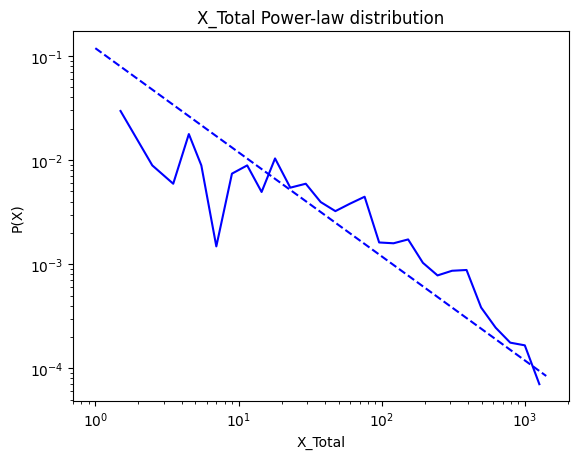

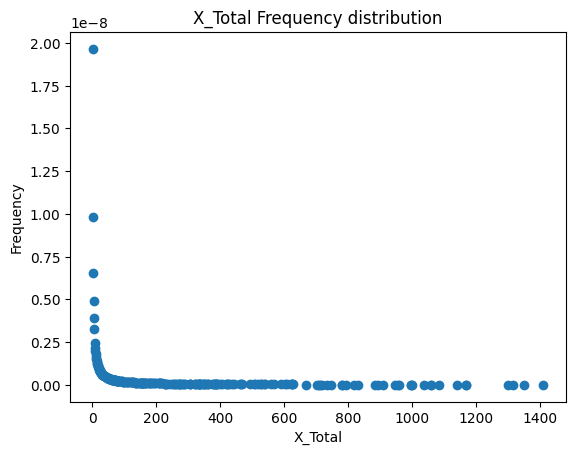

Slope of log-log line: -1.00
Z_Total - Power-law exponent: 1.00, Minimum value: 1.00


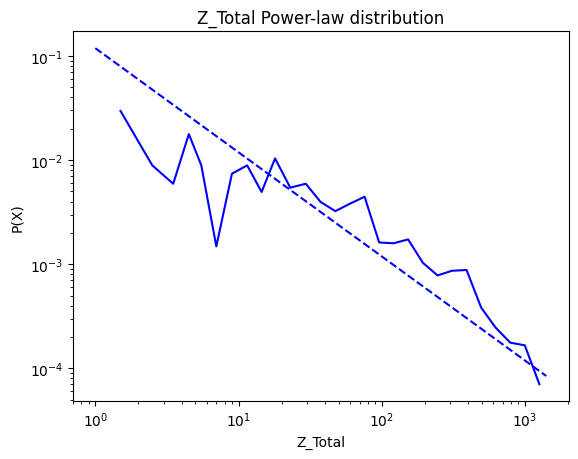

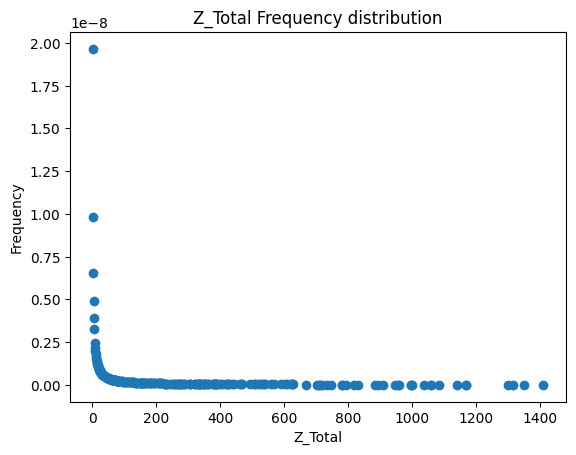

Slope of log-log line: -1.00
Analysis for group 1:
X_Total - Power-law exponent: 1.00, Minimum value: 1.00


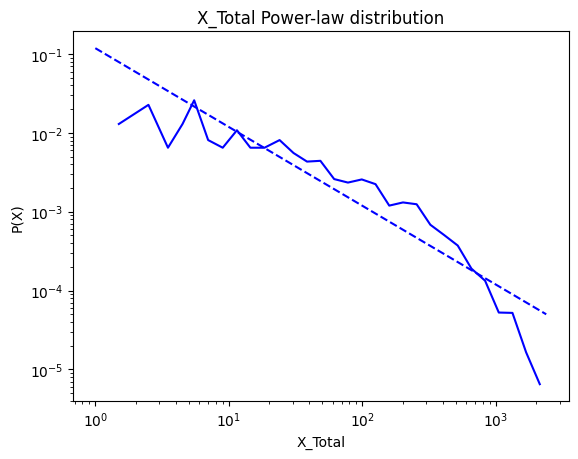

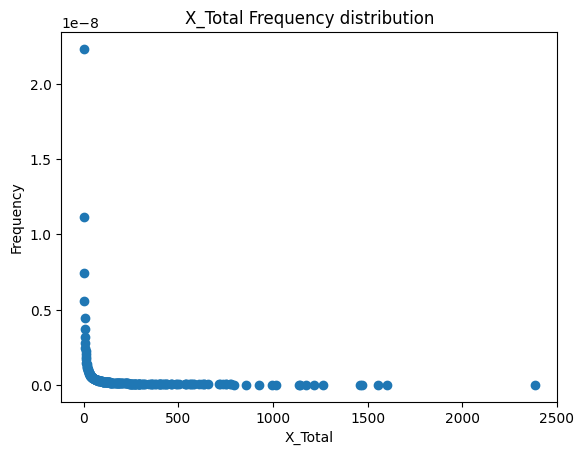

Slope of log-log line: -1.00
Z_Total - Power-law exponent: 1.00, Minimum value: 1.00


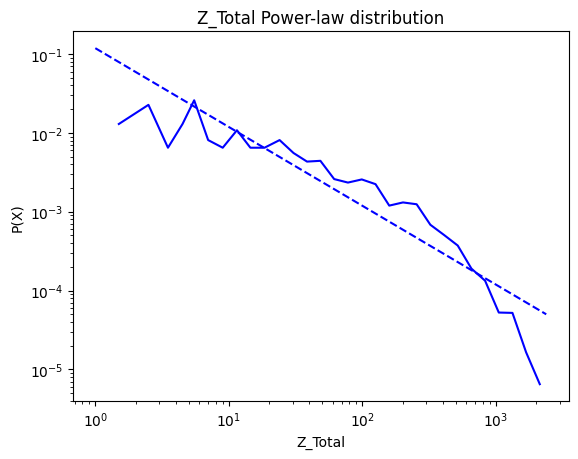

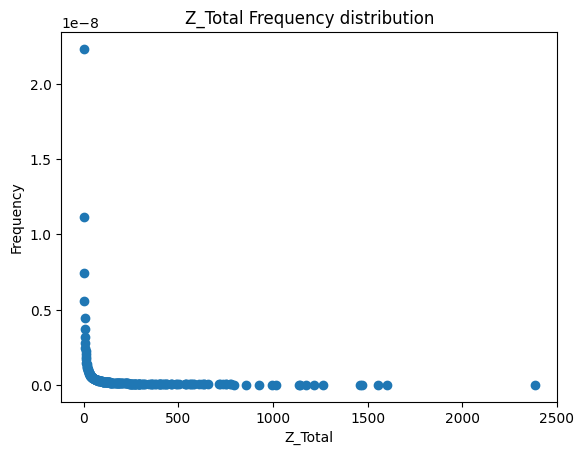

Slope of log-log line: -1.00
Analysis for group 2:
X_Total - Power-law exponent: 1.00, Minimum value: 1.00


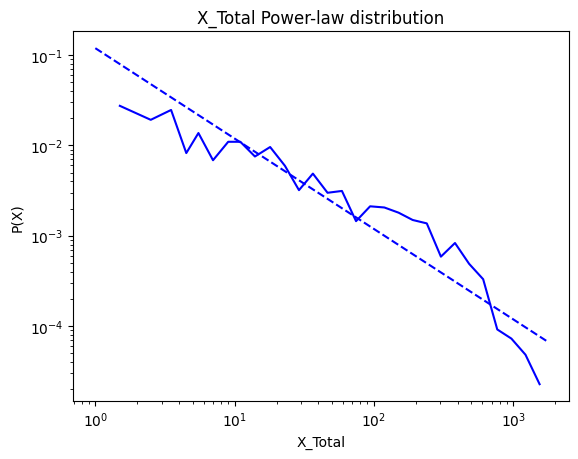

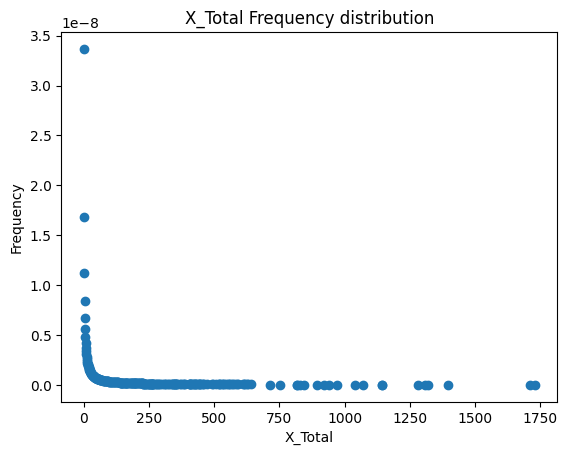

Slope of log-log line: -1.00
Z_Total - Power-law exponent: 1.00, Minimum value: 1.00


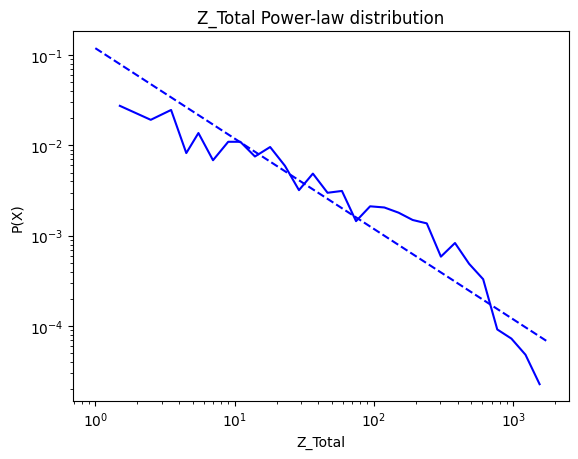

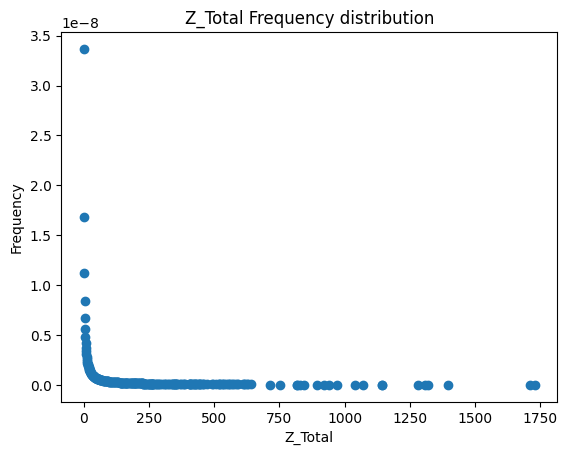

Slope of log-log line: -1.00
Analysis for group 3:
X_Total - Power-law exponent: 1.00, Minimum value: 1.00


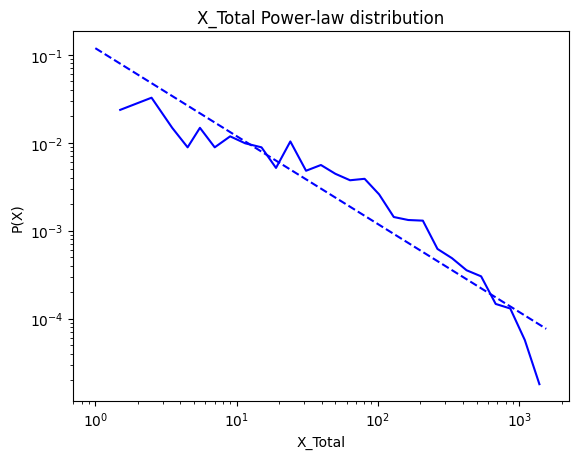

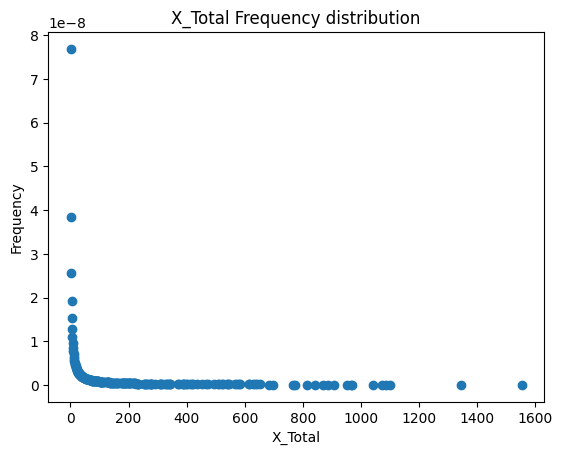

Slope of log-log line: -1.00
Z_Total - Power-law exponent: 1.00, Minimum value: 1.00


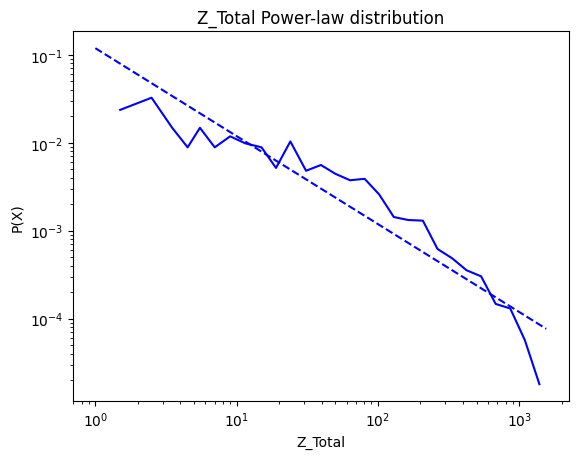

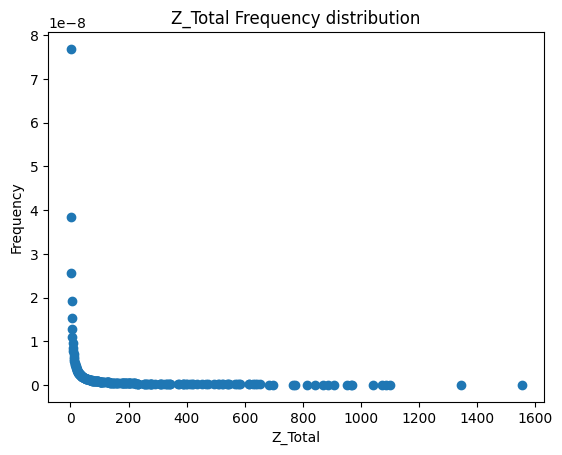

Slope of log-log line: -1.00


In [ ]:
# Analyze power-law distribution for all groups
for i, group in enumerate([group0, group10, group20, group50]):
    print(f"Analysis for group {i}:")
    for col in x_cols + z_cols:
        # Select the column with the data you want to analyze
        data = group['X Total']
        data = group['Z Total']
        
        # Filter out 0 or negative values
        data = data[data > 0]
        xmin=1
        # Fit the power-law distribution to a subset of the data
        subset = data[data <= xmax]
        results = powerlaw.Fit(subset, xmin=1, xmax=xmax, discrete=True)
        
        # Estimate the power-law exponent and minimum value of the data
        print(f"{col} - Power-law exponent: {results.power_law.alpha:.2f}, Minimum value: {results.power_law.xmin:.2f}")
        
        # Plot the data and the fitted power law
        plt.figure()
        powerlaw.plot_pdf(subset, color='b')
        results.power_law.plot_pdf(color='b', linestyle='--')
        plt.xlabel(col)
        plt.ylabel('P(X)')
        plt.title(f'{col} Power-law distribution')
        plt.show()
        # Calculate the frequency distribution using the power-law exponent and minimum value
        freq = {}
        for x in subset:
            freq[x] = results.power_law.pdf(x) * (results.power_law.alpha - 1) / (xmin ** (1 - results.power_law.alpha))
            
        # Plot the frequency distribution
        plt.figure()
        plt.scatter(freq.keys(), freq.values())
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'{col} Frequency distribution')
        plt.show()

        # Calculate the slope of the line on a log-log scale
        x = np.log10(subset)
        y = np.log10(results.power_law.pdf(subset))
        slope, _ = np.polyfit(x, y, 1)
        print(f"Slope of log-log line: {slope:.2f}")